### Imports

In [1]:
import sys
import matplotlib.pyplot as plt
import torch
sys.path.append('..')
from src.feature_extraction import FeatureExtractionConfig
from src.segmentation import Segmenter,SegmenterConfig
from src.dataset import ISICDataset
from src.utils import seed_everything, display_segmentation_results
from definitions import ISIC_DIR

### Reproducibility

In [2]:
SEED = 42
seed_everything(SEED)

### Load the dataset

In [3]:
dataset = ISICDataset(root=ISIC_DIR)
print(len(dataset))

900


### Load an example

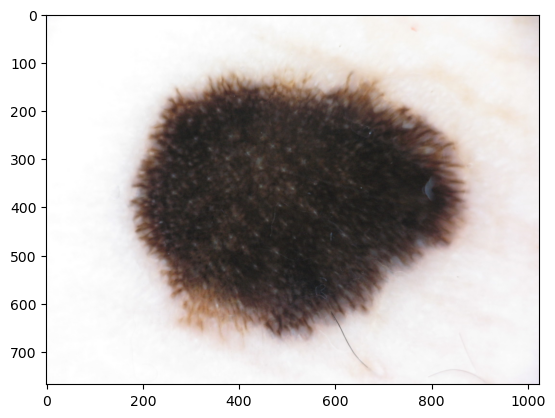

In [4]:
sample = dataset[158]
plt.imshow(sample['image'])

### Segmentation

- DeepCut : NCUT Loss

In [5]:
config = SegmenterConfig(
    segmentation_type="ncut",
    alpha=5.0,
    feature_extractor_config=FeatureExtractionConfig(
        model_name="facebook/dino-vits8",
        device="cuda",
        feature_type="key",
    ),
    activation="silu",
    num_layers=1,
    conv_type="arma",
    hidden_dim=32,
    num_clusters=2,
    device="cuda",
    threshold=0.6
)

In [6]:
segmenter = Segmenter(config)

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits8 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Optimizing:   0%|          | 0/20 [00:00<?, ?it/s]

IoU: 0.785


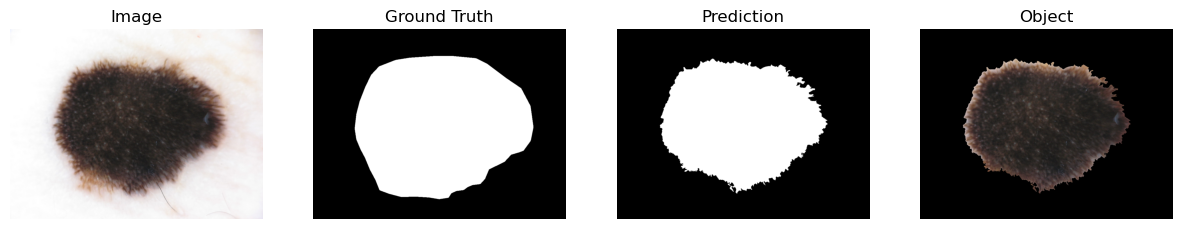

In [7]:
result = segmenter.segment(sample['image'], lr=0.001, n_iters=20, show_progress=True)
display_segmentation_results(sample, result['mask'].astype(bool).astype(int))

In [8]:
torch.cuda.empty_cache()

- DeepCut : CC Loss

In [9]:
config = SegmenterConfig(
    segmentation_type="cc",
    alpha=5.0,
    feature_extractor_config=FeatureExtractionConfig(
        model_name="facebook/dino-vits8",
        device="cuda",
        feature_type="key",
    ),
    activation="silu",
    num_layers=1,
    conv_type="gcn",
    hidden_dim=32,
    num_clusters=2,
    device="cuda",
    threshold=0.6
)

In [10]:
segmenter = Segmenter(config)

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits8 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Optimizing:   0%|          | 0/100 [00:00<?, ?it/s]

IoU: 0.844


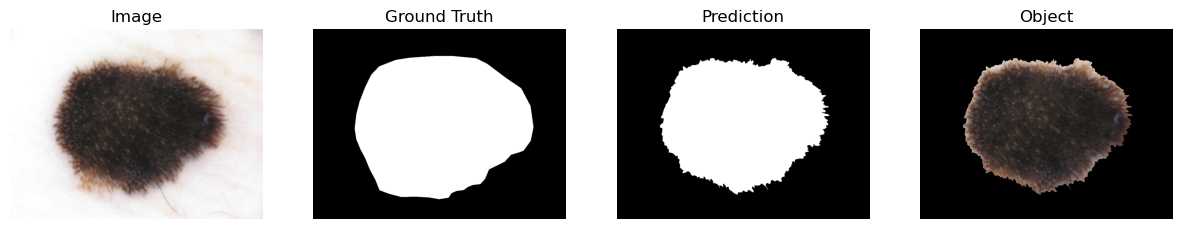

In [11]:
result = segmenter.segment(sample['image'], lr=0.001, n_iters=100, show_progress=True)
display_segmentation_results(sample, result['mask'].astype(bool).astype(int))

In [12]:
torch.cuda.empty_cache()

- UnSegGNet / UnSeGArmaNet

In [13]:
config = SegmenterConfig(
    segmentation_type="dmon",
    alpha=5.0,
    feature_extractor_config=FeatureExtractionConfig(
        model_name="facebook/dino-vits8",
        device="cuda",
        feature_type="key",
    ),
    activation="silu",
    num_layers=1,
    conv_type="arma",
    hidden_dim=32,
    num_clusters=2,
    device="cuda",
    threshold=0.7
)

In [14]:
segmenter = Segmenter(config)

Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vits8 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Optimizing:   0%|          | 0/50 [00:00<?, ?it/s]

IoU: 0.941


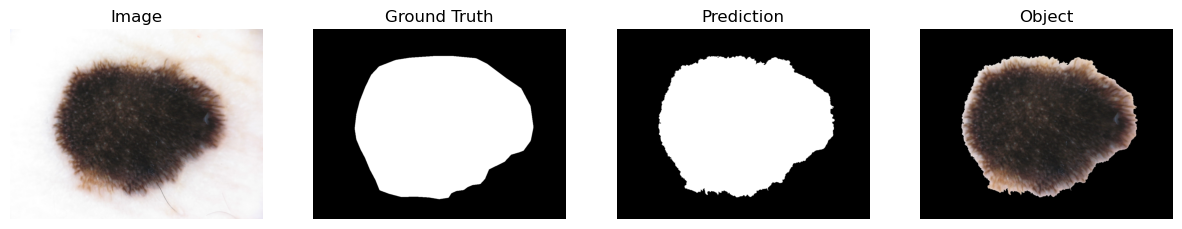

In [15]:
result = segmenter.segment(sample['image'], lr=0.001, n_iters=50, show_progress=True)
display_segmentation_results(sample, result['mask'].astype(bool).astype(int))